In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

Importing dataset

In [74]:
heart_data = pd.read_csv('D:/122B1F034/Dataset/heart.csv')

In [75]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

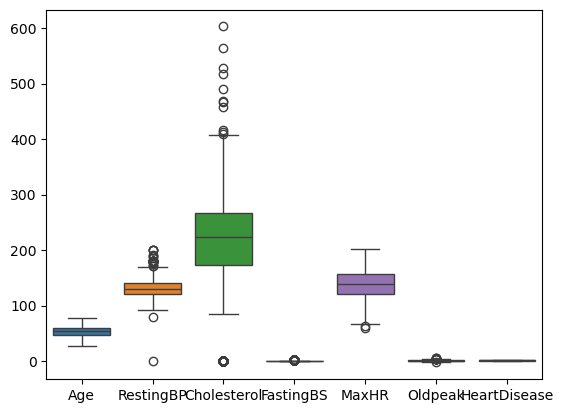

In [76]:
sns.boxplot(heart_data)

# DATA CLEANING

Cheack for missing dataset

In [77]:
missingValues = heart_data.isnull().sum()
missingValues

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Removing duplicates if present

In [78]:
heartDataCleaned = heart_data.drop_duplicates()
heartDataCleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Standardizing Categorical Columns

In [79]:
heartDataCleaned['ChestPainType'] = heartDataCleaned['ChestPainType'].str.upper()
heartDataCleaned['RestingECG'] = heartDataCleaned['RestingECG'].str.capitalize()
heartDataCleaned['ExerciseAngina'] = heartDataCleaned['ExerciseAngina'].str.upper()
heartDataCleaned['ST_Slope'] = heartDataCleaned['ST_Slope'].str.capitalize()
heartDataCleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,St,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,Lvh,174,N,0.0,Flat,1


# Error Correction

Finding and removing the outliers from age,RestingBP,Cholesterol,MaxHR

Remove age outliers (reasonable age range for the dataset is 18-100)

In [80]:
ageOutliers = heartDataCleaned[(heartDataCleaned['Age'] < 18) | (heartDataCleaned['Age'] > 100)]
print("\nAge Outliers:\n", ageOutliers)


Age Outliers:
 Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


Remove cholesterol outliers 

In [81]:
data = data[(data['Cholesterol'] >= 100) & (data['Cholesterol'] <= 600)]

In [83]:
data = heartDataCleaned
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Cholesterol'] = data['Cholesterol'].apply(lambda x: min(max(x, lower_bound), upper_bound))
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,St,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,Lvh,174,N,0.0,Flat,1


Remove RestingBP outliers 

In [84]:
Q1 = data['RestingBP'].quantile(0.25)  # First quartile
Q3 = data['RestingBP'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['RestingBP'] = data['RestingBP'].apply(lambda x: min(max(x, lower_bound), upper_bound))
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,St,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,Lvh,174,N,0.0,Flat,1


Remove MaxHR outliers (common heart rate range: 60-220)

In [85]:
maxHROutliers = data[(data['MaxHR'] < 60) | (data['MaxHR'] > 220)]
print("\nMaxHR Outliers:\n", maxHROutliers)
data = data[(data['MaxHR'] >= 60) & (data['MaxHR'] <= 220)]


MaxHR Outliers:
 Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [86]:
Q1 = data['MaxHR'].quantile(0.25)  
Q3 = data['MaxHR'].quantile(0.75) 
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['MaxHR'] = data['MaxHR'].apply(lambda x: min(max(x, lower_bound), upper_bound))

Identify Oldpeak outliers (values outside the range of 0 to 6)

In [87]:
oldpeakOutliers = data[(data['Oldpeak'] < 0) | (data['Oldpeak'] > 6)]
print("\nOldpeak Outliers:\n", oldpeakOutliers)
data = data[(data['Oldpeak'] >= 0) & (data['Oldpeak'] <= 6)]


Oldpeak Outliers:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
321   63   M           ASY      100.0       32.625          1     Normal   
324   46   M           ASY      100.0       32.625          1         St   
325   42   M           ASY      105.0       32.625          1     Normal   
326   45   M           NAP      110.0       32.625          0     Normal   
331   56   M           ASY      115.0       32.625          1         St   
332   38   M           NAP      100.0       32.625          0     Normal   
334   51   M           ASY      130.0       32.625          1     Normal   
335   62   M            TA      120.0       32.625          1        Lvh   
352   56   M           ASY      120.0       32.625          0         St   
407   62   M           ASY      115.0       32.625          1     Normal   
413   56   M           NAP      125.0       32.625          1     Normal   
421   66   M           NAP      120.0       32.625          0       

In [88]:
Q1 = data['Oldpeak'].quantile(0.25)  
Q3 = data['Oldpeak'].quantile(0.75) 
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Oldpeak'] = data['Oldpeak'].apply(lambda x: min(max(x, lower_bound), upper_bound))

In [90]:
print("\nData after removing Oldpeak outliers:\n")
data


Data after removing Oldpeak outliers:



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,St,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,Lvh,174.0,N,0.0,Flat,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             904 non-null    int64  
 1   Sex             904 non-null    object 
 2   ChestPainType   904 non-null    object 
 3   RestingBP       904 non-null    float64
 4   Cholesterol     904 non-null    float64
 5   FastingBS       904 non-null    int64  
 6   RestingECG      904 non-null    object 
 7   MaxHR           904 non-null    float64
 8   ExerciseAngina  904 non-null    object 
 9   Oldpeak         904 non-null    float64
 10  ST_Slope        904 non-null    object 
 11  HeartDisease    904 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 91.8+ KB


<Axes: >

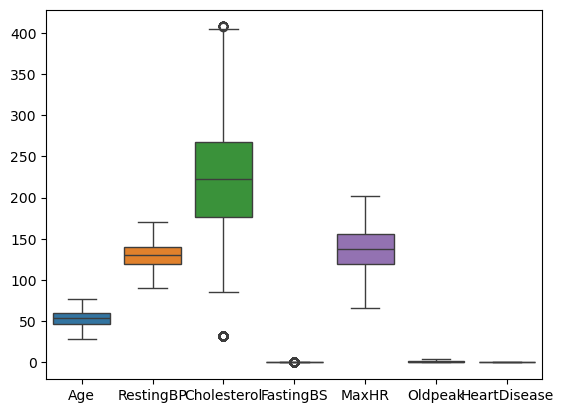

In [92]:
sns.boxplot(data)